In [1]:
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline
import pandas as pd
import random
from scipy.stats import multivariate_normal
#scipy.__version__
np.__version__

'1.10.4'

# Worksheet 6  - Problem 9

In [2]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    #plt.show()

In [3]:
#loading training data
train_img, train_lbl = loadmnist('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')

# A) Display The First Data Point

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


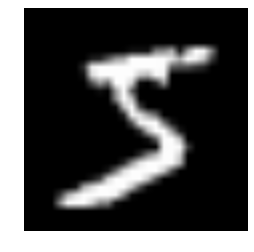

In [4]:
#Display image
%pylab inline
displaychar(train_img[0])

# B) Load the test data, split the training set into two pieces, Validation and Sampling

In [5]:
#load the test data
test_img, test_lbl = loadmnist('t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte')

In [6]:
import random 

#Create random sample list of images and indexes

sample_index=random.sample(range(len(train_img)),int(len(train_img)/6))
sample_images=[train_img[i] for i in sample_index]
sample_lbl=[train_lbl[i] for i in sample_index]

In [7]:
#Create lists for validation images and indexes

valid_index=[i for i in range(len(train_img)) if i not in sample_index]
val_images=[train_img[i] for i in valid_index]
val_lbl=[train_lbl[i] for i in valid_index]

In [8]:
print len(sample_index)

10000


# C) Fit Gaussian generative model to the training data of 50,000 points

In [9]:
from __future__ import division
def Gaussian_gen_classifier(sample_lbl, sample_images, val_lbl, val_images, c_value):
    prob = []
    for label in range(10):    
        indices = [i for i,x in enumerate(sample_lbl) if x == label]
        pi = len(indices)/len(sample_lbl)
        images = [sample_images[i] for i in indices]
        mean = np.mean(images, axis = 0)
        cov = np.cov(np.transpose(images)) + (c_value*np.identity(784)) 
        func = scipy.stats.multivariate_normal(mean, cov)
        prob.append(np.log(pi) + func.logpdf(val_images))
    max_prob = np.argmax(prob, axis = 0)
    error = np.sum([i!=j for i,j in zip(max_prob, val_lbl)])/len(val_lbl)
    return error

# Find best C value for C*I

In [11]:
#Find the best C value to use
import scipy
c_value = []
err = []
for i in range(3000, 7000, 1000):
    err.append(Gaussian_gen_classifier(sample_lbl, sample_images, val_lbl, val_images,i))
    c_value.append(i)
best_c= c_value[np.argmin(err)]
print c_value
print err
print best_c

[3000, 4000, 5000, 6000]
[0.050880000000000002, 0.050959999999999998, 0.051819999999999998, 0.053319999999999999]
3000


In [12]:
c_value = []
err = []
for i in range(3500, 4500, 100):
    err.append(Gaussian_gen_classifier(sample_lbl, sample_images, val_lbl, val_images,i))
    c_value.append(i)
best_c= c_value[np.argmin(err)]
print c_value
print err
print best_c

[3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400]
[0.050900000000000001, 0.050819999999999997, 0.050860000000000002, 0.050939999999999999, 0.050939999999999999, 0.050959999999999998, 0.051020000000000003, 0.051159999999999997, 0.051200000000000002, 0.051240000000000001]
3600


In [13]:
# Third iteration for the best C value
c_value = []
err = []
for i in range(3550, 3610, 10):
    err.append(Gaussian_gen_classifier(sample_lbl, sample_images, val_lbl, val_images,i))
    c_value.append(i)
best_c= c_value[np.argmin(err)]
print c_value
print err
print "Best C Value", best_c

[3550, 3560, 3570, 3580, 3590, 3600]
[0.050779999999999999, 0.050840000000000003, 0.050840000000000003, 0.050840000000000003, 0.050860000000000002, 0.050819999999999997]
Best C Value 3550


In [14]:
check=[]
for i in range(3550, 3610, 10):
    check.append(i)
print check

[3550, 3560, 3570, 3580, 3590, 3600]


# Using C Value of 3550 Classify Test Images and Check Error

In [15]:
error = Gaussian_gen_classifier(train_lbl, train_img, test_lbl, test_img, 3550)
print('Error Rate:\t',error*100,'%')

('Error Rate:\t', 4.3799999999999999, '%')


In [16]:
def error_list(sample_lbl, sample_images, val_lbl, val_images, c_value):

    #copied function from above
    prob = []
    for label in range(10):    
        indices = [i for i,x in enumerate(sample_lbl) if x == label]
        pi = len(indices)/len(sample_lbl)
        images = [sample_images[i] for i in indices]
        mean = np.mean(images, axis = 0)
        cov = np.cov(np.transpose(images)) + (c_value*np.identity(784)) 
        func = scipy.stats.multivariate_normal(mean, cov)
        prob.append(np.log(pi) + func.logpdf(val_images))
    max_prob = np.argmax(prob, axis = 0)
    error = np.sum([i!=j for i,j in zip(max_prob, val_lbl)])/len(val_lbl)
    label = []
    image = []
    probability = []
    prob = np.matrix(prob)
    for index in range(len(val_lbl)):
        if val_lbl[index] != max_prob[index]:
            image.append(val_images[index])
            label.append(max_prob[index])
            probability.append(prob[:, index])
    return [image, label, probability]

In [17]:
[image, label, probability] = error_list(train_lbl, train_img, test_lbl, test_img, 3550)

In [18]:
len(image)

438

In [ ]:
#error_list(train_lbl, train_img, test_lbl, test_img, 3550)

# Display 5 Random Misclassified Digits 

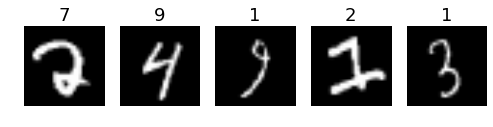

In [24]:
#Display misclassified images with predicted labels
index = 0
plt.figure(figsize=(10,5))
for img, lbl in zip(image[200:205], label[200:205]):
    index += 1
    plt.subplot(1, 6, index)
    displaychar(img)
    plt.title('%i' % lbl, fontsize = 18)